In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
df= pd.read_csv('/content/drive/My Drive/Colab Notebooks/latihan/big_mart.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
def item_fat_category(item_fat):
  item_fat = str(item_fat).lower()

  if 'LF' in item_fat or 'low fat' in item_fat:
    return 'Low Fat'
  elif 'reg' in item_fat:
    return 'Regular'
  else:
    return 'other'

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].apply(item_fat_category)
df['Item_Fat_Content'].value_counts()

Low Fat    5201
Regular    3006
other       316
Name: Item_Fat_Content, dtype: int64

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
mean=df.mean()
df.fillna(mean)

<ipython-input-73-9dc36f28a3ee>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean=df.mean()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df2=df.dropna()

In [ ]:
df2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df2.duplicated().sum()

0

In [ ]:
df2['Outlet_Type'].value_counts()

Supermarket Type1    3722
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
df2.to_csv('/content/drive/My Drive/Colab Notebooks/latihan/big_mart_clean.csv')

# Exploratory Data Analyst

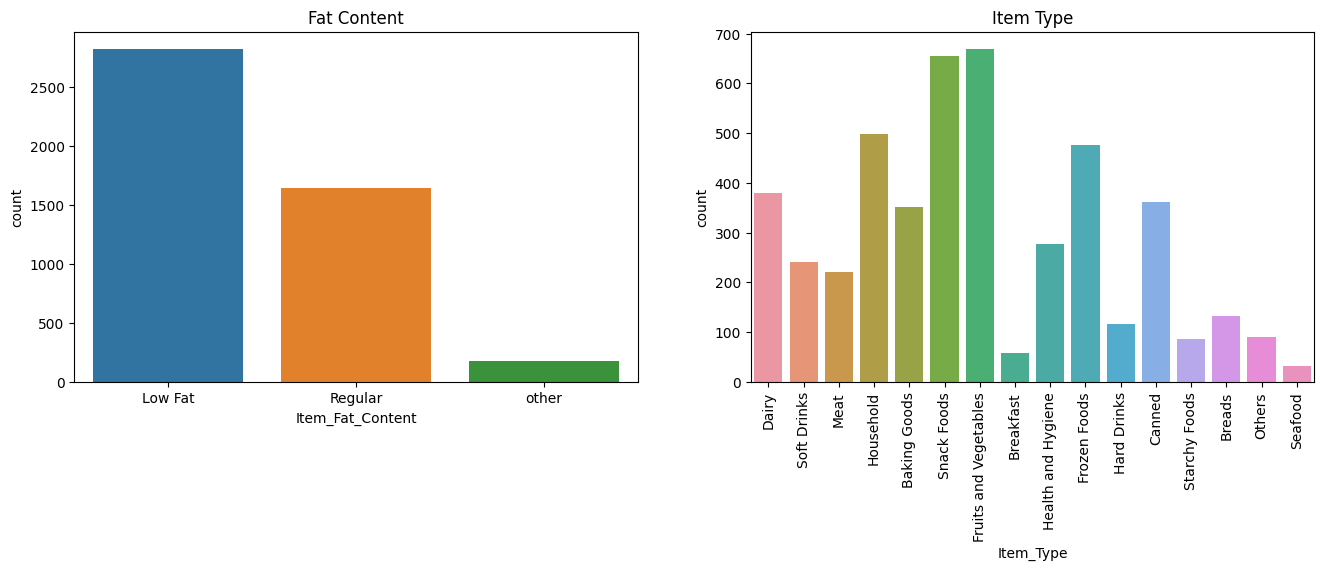

In [ ]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sns.countplot(x='Item_Fat_Content', data=df2)
plt.title('Fat Content')

plt.subplot(2,2,2)
sns.countplot(x='Item_Type', data=df2)
plt.xticks(rotation=90)
plt.title('Item Type');

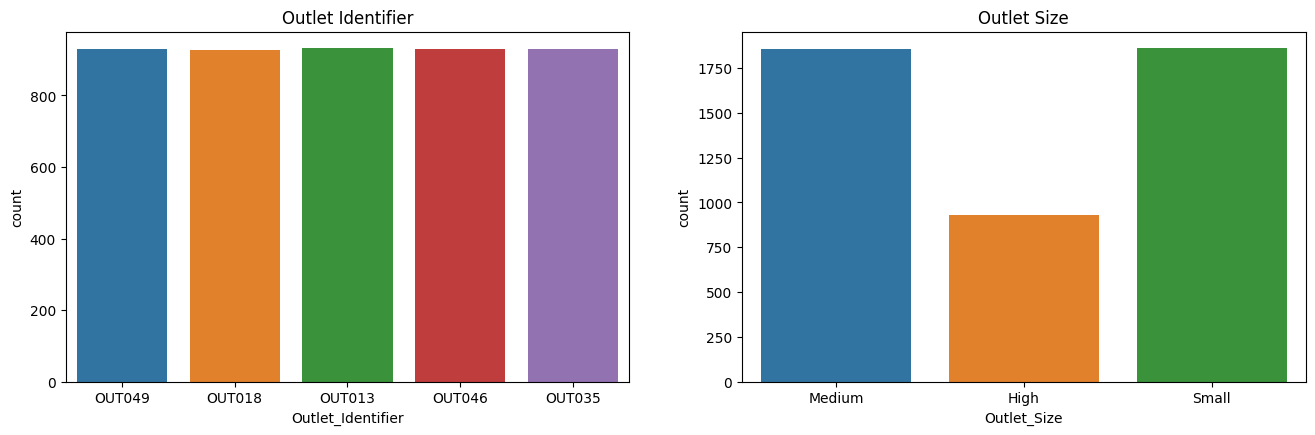

In [ ]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sns.countplot(x='Outlet_Identifier', data=df2)
plt.title('Outlet Identifier')

plt.subplot(2,2,2)
sns.countplot(x='Outlet_Size', data=df2)
plt.title('Outlet Size');

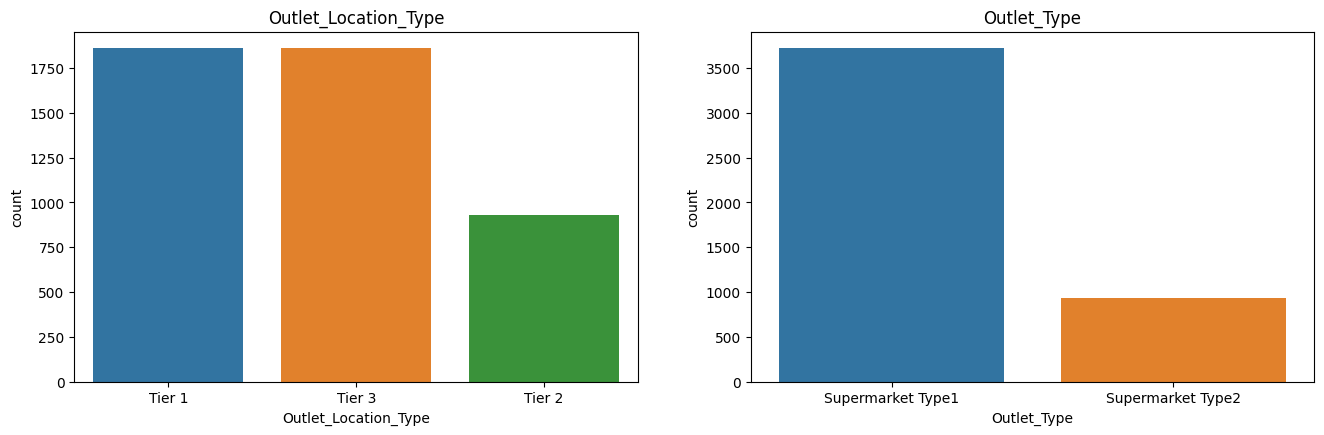

In [ ]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sns.countplot(x='Outlet_Location_Type', data=df2)
plt.title('Outlet_Location_Type')

plt.subplot(2,2,2)
sns.countplot(x='Outlet_Type', data=df2)
plt.title('Outlet_Type');

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

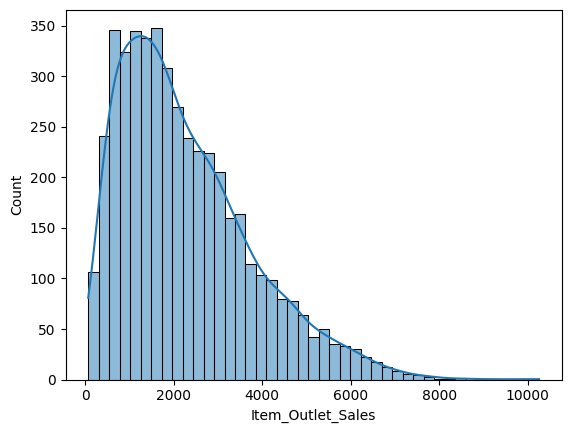

In [ ]:
sns.histplot(x='Item_Outlet_Sales', kde=True, data=df2)

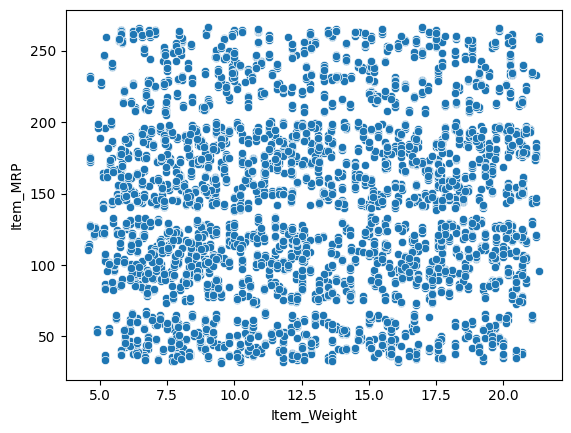

In [ ]:
sns.scatterplot(x='Item_Weight', y='Item_MRP', data=df2);

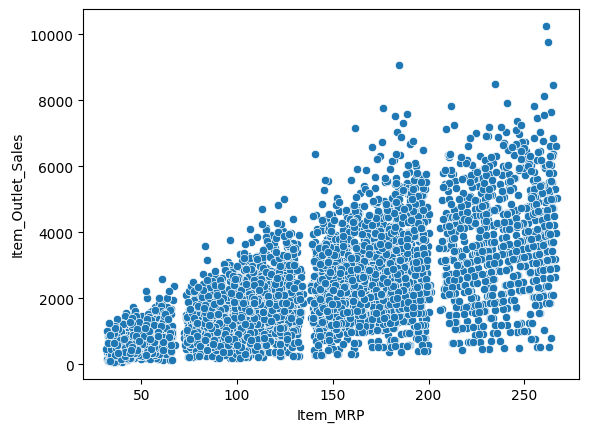

In [ ]:
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df2);

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

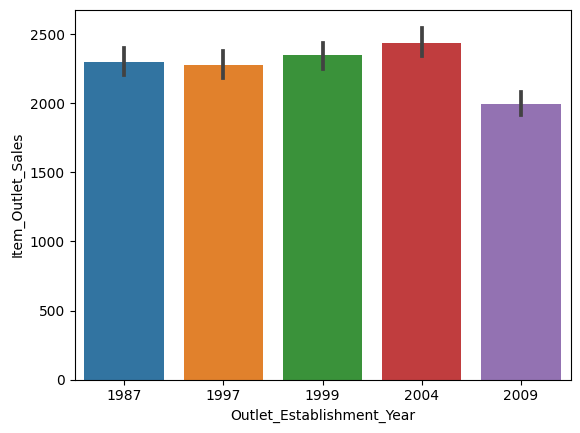

In [ ]:
sns.barplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales',data=df2)

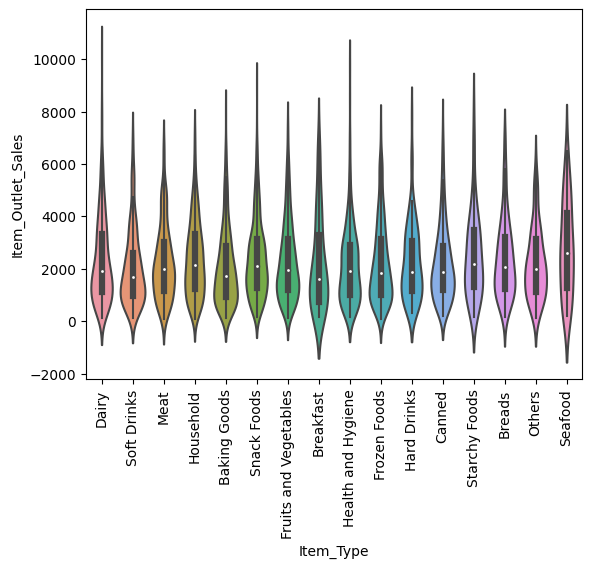

In [ ]:
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', data=df2)
plt.xticks(rotation=90);

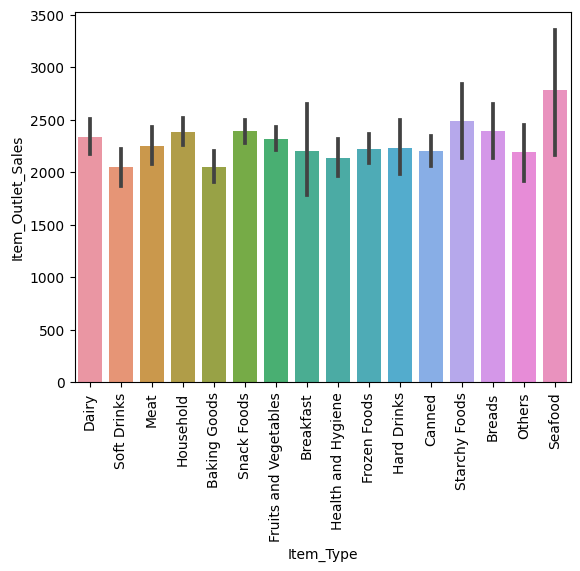

In [ ]:
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df2)
plt.xticks(rotation=90);

Data Preprocessing 2

In [ ]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
variabel=['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for i in variabel:
  le.fit(df2[i])
  (df2[i])=le.transform(df2[i])
  print(i,(df2[i]).unique())

Item_Identifier [ 154    8  656 ...  251 1029  685]
Item_Fat_Content [0 1 2]
Item_Type [ 4 14 10  9  0 13  6  2  8  5  7  3 15  1 11 12]
Outlet_Identifier [4 1 0 3 2]
Outlet_Size [1 0 2]
Outlet_Location_Type [0 2 1]
Outlet_Type [0 1]


<ipython-input-121-6df5d1439130>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (df2[i])=le.transform(df2[i])
<ipython-input-121-6df5d1439130>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (df2[i])=le.transform(df2[i])
<ipython-input-121-6df5d1439130>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [ ]:
df2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,154,9.300,0,0.016047,4,249.8092,4,1999,1,0,0,3735.1380
1,8,5.920,1,0.019278,14,48.2692,1,2009,1,2,1,443.4228
2,656,17.500,0,0.016760,10,141.6180,4,1999,1,0,0,2097.2700
4,1277,8.930,0,0.000000,9,53.8614,0,1987,0,2,0,994.7052
5,750,10.395,1,0.000000,0,51.4008,1,2009,1,2,1,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,386,20.750,1,0.083607,5,178.8318,3,1997,2,0,0,3608.6360
8518,367,6.865,0,0.056783,13,214.5218,0,1987,0,2,0,2778.3834
8520,1336,10.600,0,0.035186,8,85.1224,2,2004,2,1,0,1193.1136
8521,675,7.210,1,0.145221,13,103.1332,1,2009,1,2,1,1845.5976


In [ ]:
#df2.drop(columns='Item_Identifier', axis=1, inplace=True)

In [ ]:
df2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,4,1999,1,0,0,3735.1380
1,5.920,1,0.019278,14,48.2692,1,2009,1,2,1,443.4228
2,17.500,0,0.016760,10,141.6180,4,1999,1,0,0,2097.2700
4,8.930,0,0.000000,9,53.8614,0,1987,0,2,0,994.7052
5,10.395,1,0.000000,0,51.4008,1,2009,1,2,1,556.6088


In [ ]:
#scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2[['Item_Weight','Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']] = scaler.fit_transform(df2[['Item_Weight','Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']])

<ipython-input-133-db5edd6cc58a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['Item_Weight','Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']] = scaler.fit_transform(df2[['Item_Weight','Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']])


In [ ]:
df2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.770517,0,0.016047,4,1.731874,4,-0.025790,1,0,0,0.976831
1,-1.494212,1,0.019278,14,-1.497218,1,1.327755,1,2,1,-1.220864
2,0.985195,0,0.016760,10,-0.001575,4,-0.025790,1,0,0,-0.116683
4,-0.849738,0,0.000000,9,-1.407620,0,-1.650045,0,2,0,-0.852804
5,-0.536065,1,0.000000,0,-1.447044,1,1.327755,1,2,1,-1.145296
...,...,...,...,...,...,...,...,...,...,...,...
8517,1.681056,1,0.083607,5,0.594668,3,-0.296499,2,0,0,0.892372
8518,-1.291877,0,0.056783,13,1.166496,0,-1.650045,0,2,0,0.338059
8520,-0.492172,0,0.035186,8,-0.906753,2,0.650983,2,1,0,-0.720337
8521,-1.218009,1,0.145221,13,-0.618182,1,1.327755,1,2,1,-0.284710


<Axes: >

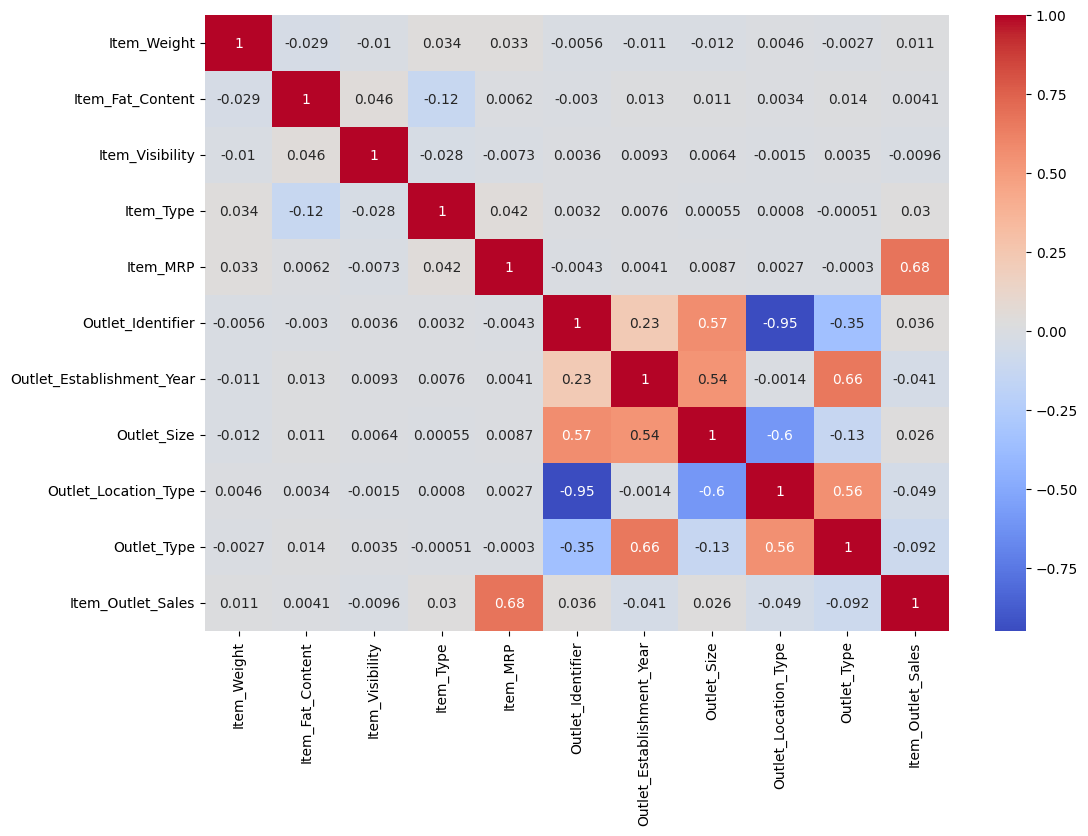

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

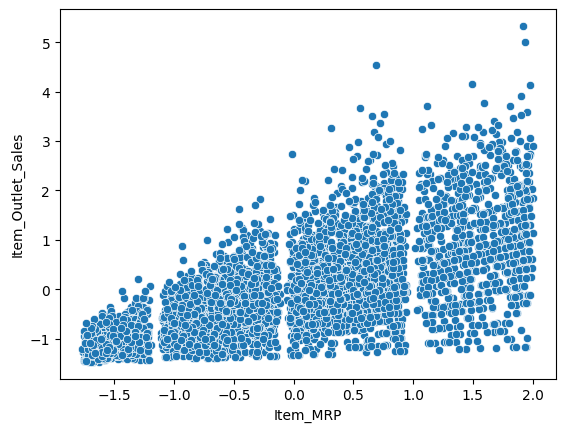

In [ ]:
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df2)

Training model with Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.drop('Outlet_Type', axis=1), df2['Outlet_Type'], test_size=0.2, random_state=0)

Metode Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rfc.score(X_test, y_test)

1.0

In [ ]:
y_rfc_pred= rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       753
           1       1.00      1.00      1.00       177

    accuracy                           1.00       930
   macro avg       1.00      1.00      1.00       930
weighted avg       1.00      1.00      1.00       930



In [ ]:
print(confusion_matrix(y_test, y_rfc_pred))

[[753   0]
 [  0 177]]


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier()

In [ ]:
parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt'],  # Mengatur max_features menjadi 'sqrt'
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(dtr, parameters, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

print('The Parameters are:', grid_search.best_params_)


The Parameters are: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'splitter': 'best'}


In [ ]:
dtr=DecisionTreeClassifier(criterion = grid_search.best_params_.get('criterion'),
                                  splitter = grid_search.best_params_.get('splitter'),
                                  max_depth = grid_search.best_params_.get('max_depth'),
                                  max_features = grid_search.best_params_.get('max_features'),
                                  min_samples_leaf = grid_search.best_params_.get('min_samples_leaf'),
                                  min_samples_split = grid_search.best_params_.get('min_samples_split'),
                                  random_state = 42)

In [ ]:
dtr.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=4, random_state=42)

In [ ]:
dtr.score(X_test,y_test)

1.0

In [ ]:
y_dtr_pred=dtr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_dtr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       753
           1       1.00      1.00      1.00       177

    accuracy                           1.00       930
   macro avg       1.00      1.00      1.00       930
weighted avg       1.00      1.00      1.00       930



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_dtr_pred))

[[753   0]
 [  0 177]]


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='newton-cg')

lr.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [ ]:
lr.score(X_test,y_test)

1.0

In [ ]:
y_lr_pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       753
           1       1.00      1.00      1.00       177

    accuracy                           1.00       930
   macro avg       1.00      1.00      1.00       930
weighted avg       1.00      1.00      1.00       930



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_lr_pred))

[[753   0]
 [  0 177]]


K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test, y_test)

1.0

In [ ]:
y_knn_pred= knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       753
           1       1.00      1.00      1.00       177

    accuracy                           1.00       930
   macro avg       1.00      1.00      1.00       930
weighted avg       1.00      1.00      1.00       930



In [ ]:
print(confusion_matrix(y_test, y_knn_pred))

[[753   0]
 [  0 177]]


Model Evaluation

Text(792.3131313131312, 0.5, 'Predict Value')

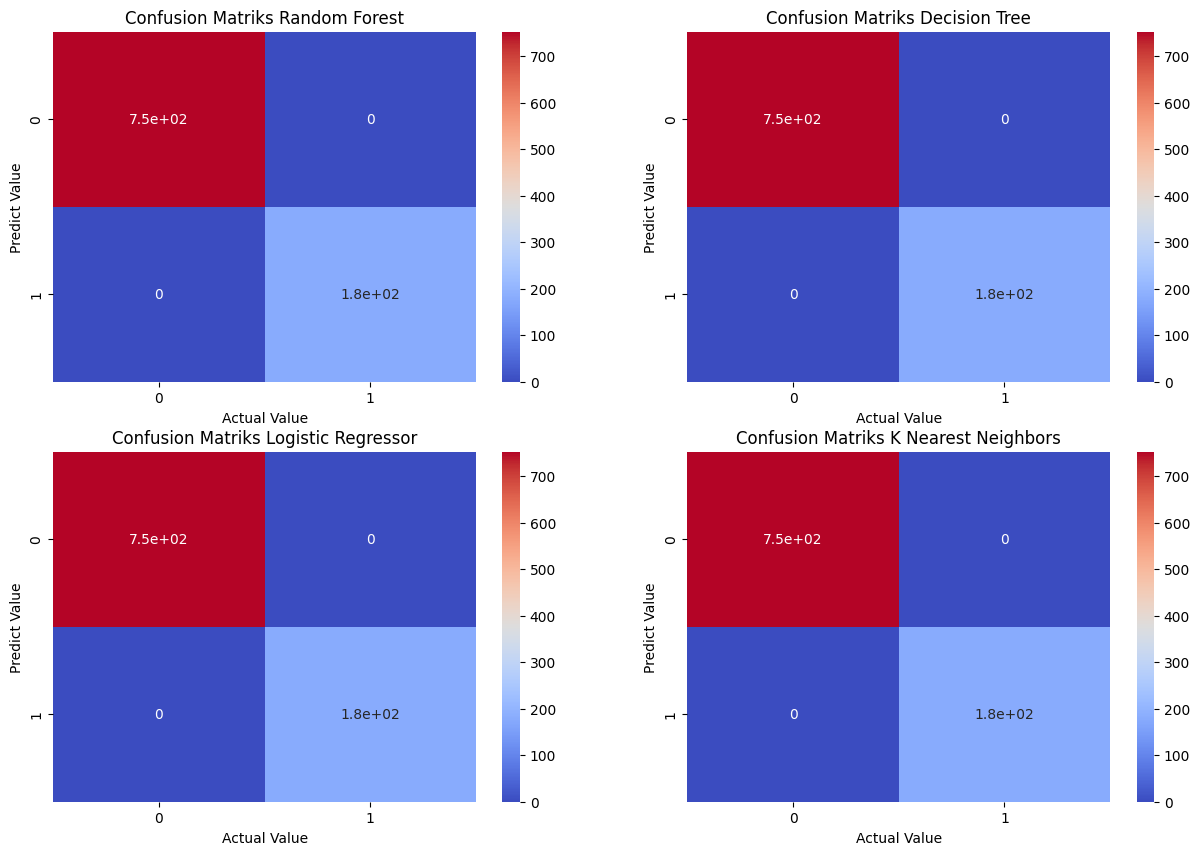

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.heatmap(confusion_matrix(y_test, y_rfc_pred), annot=True, cmap='coolwarm')
plt.title('Confusion Matriks Random Forest')
plt.xlabel('Actual Value')
plt.ylabel('Predict Value')

plt.subplot(2,2,2)
sns.heatmap(confusion_matrix(y_test, y_dtr_pred), annot=True, cmap='coolwarm')
plt.title('Confusion Matriks Decision Tree')
plt.xlabel('Actual Value')
plt.ylabel('Predict Value')

plt.subplot(2,2,3)
sns.heatmap(confusion_matrix(y_test, y_lr_pred), annot=True, cmap='coolwarm')
plt.title('Confusion Matriks Logistic Regressor')
plt.xlabel('Actual Value')
plt.ylabel('Predict Value')

plt.subplot(2,2,4)
sns.heatmap(confusion_matrix(y_test, y_knn_pred), annot=True, cmap='coolwarm')
plt.title('Confusion Matriks K Nearest Neighbors')
plt.xlabel('Actual Value')
plt.ylabel('Predict Value')
